In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of skaro, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from skaro.model import Model
from skaro.particles import rotated_dataset
from skaro.fields import Fields

from skaro.visualization.yt_maps import (
    plot_planet_maps,
    planet_figure_name_formatting,
)

## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"
num_embryos = 50
# host_star_masses = (0.1, 0.3, 0.5, 0.7, 1)
host_star_masses = 1
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
]

In [5]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo

yt : [INFO     ] 2023-11-26 13:29:19,856 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-11-26 13:29:20,011 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-11-26 13:29:20,013 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-26 13:29:20,014 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-11-26 13:29:20,016 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-11-26 13:29:20,017 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-11-26 13:29:20,017 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-11-26 13:29:20,018 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-11-26 13:29:20,019 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-11-26 13:29:20,020 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-11-26 13:29:20,021 Parameters: hubble_constant      

## PLOT SETUP

In [6]:
figure_subdirectory = (
    f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Planet_maps"
)
save = True

## CREATE DATA SOURCE

In [15]:
radius = 80  # can contain a cube of 80/sqrt(3) = 46 kpc, so plots with a smaller width will have no edge effects
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [16]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

In [17]:
# define (all) planets field to containing all planet categories considered here
model.ds.add_field(
    ("stars", "All Planet"),
    function=lambda field, data: np.sum(
        np.array([data["stars", category] for category in planet_categories]),
        axis=0,
    ),
    sampling_type="local",
    units="auto",
    dimensions=1,
    force_override=True,
)

In [18]:
rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        *[("stars", f"{category}") for category in planet_categories + ["All Planet"]],
    ],
    bounding_box=[[-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]]
    * 3,
)

yt : [INFO     ] 2023-11-26 14:45:06,944 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-11-26 14:45:06,947 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-11-26 14:45:06,949 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-11-26 14:45:06,950 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2023-11-26 14:45:06,951 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-11-26 14:45:06,955 Allocating for 2.584e+06 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-11-26 15:09:00,457 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 15:09:00,458 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 15:09:00,463 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 15:09:00,464 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 15:09:00,466 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 15:09:01,928 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 15:09:02,900 Splatting (('stars', 'All Planet')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 15:09:03,825 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 15:09:04,728 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 15:09:06,331 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'


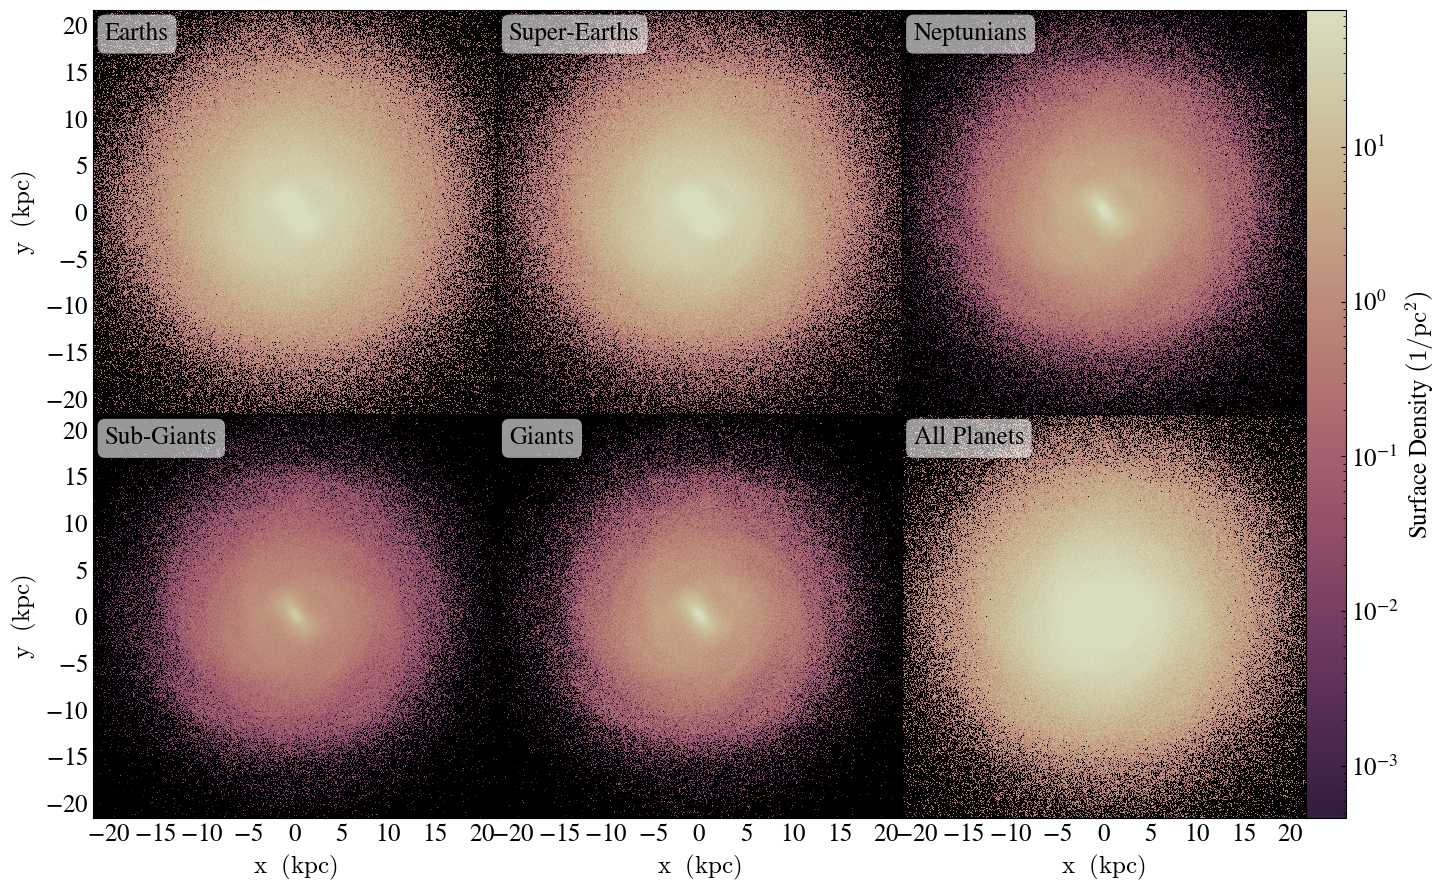

In [20]:
zplot, zfig = plot_planet_maps(
    planet_categories + ["All Planet"],
    rotated_sphere_data,
    normal="z",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)

## SIDE-ON MAPS

yt : [INFO     ] 2023-11-26 14:45:09,905 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 14:45:09,906 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 14:45:09,910 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 14:45:09,911 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-11-26 14:45:09,913 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 14:45:11,237 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 14:45:12,071 Splatting (('stars', 'All Planet')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 14:45:12,895 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 14:45:13,714 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-11-26 14:45:14,552 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'


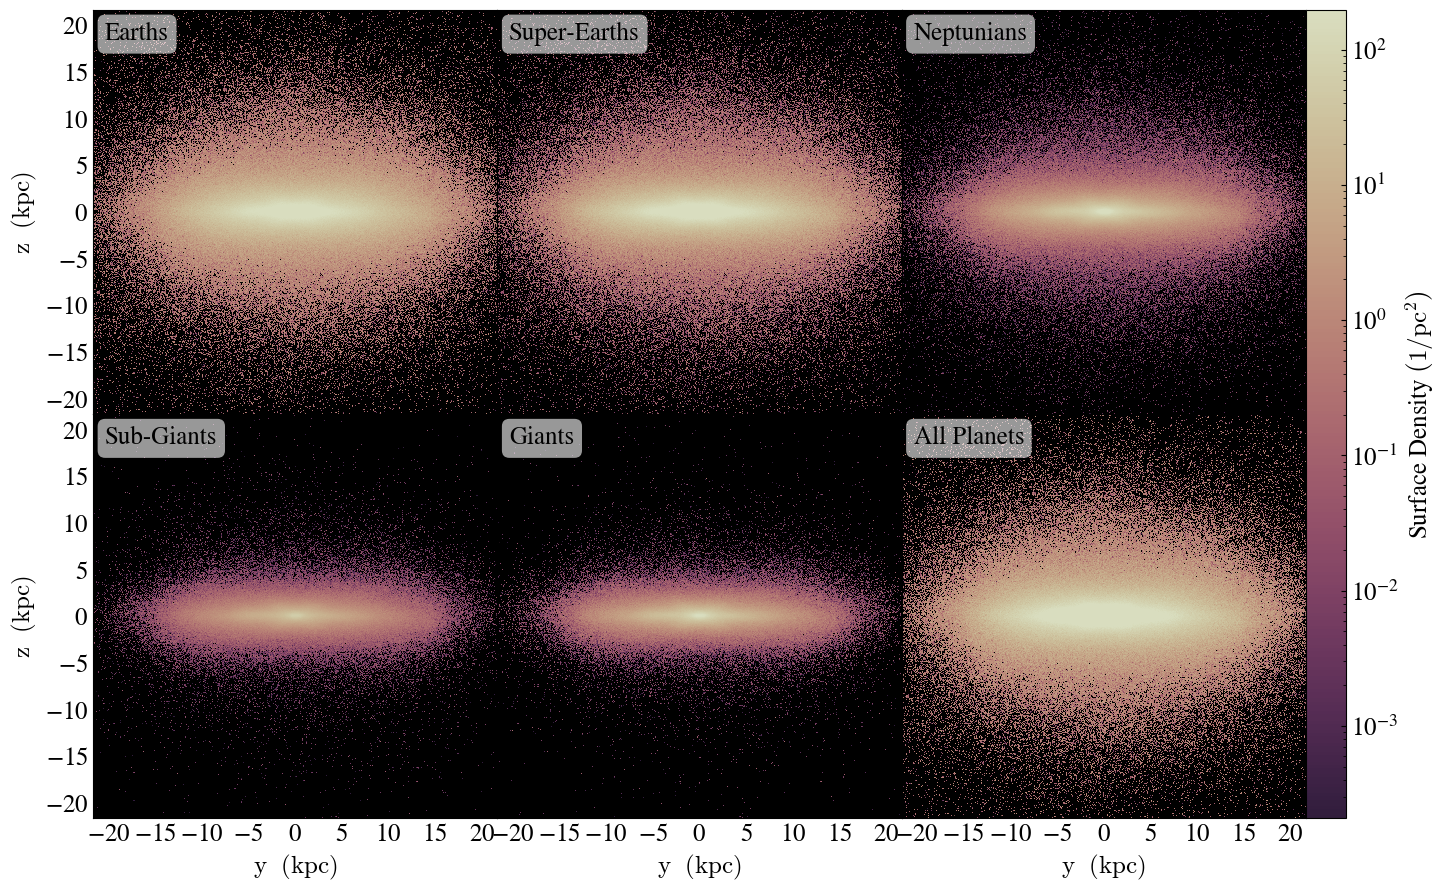

In [19]:
zplot, zfig = plot_planet_maps(
    planet_categories + ["All Planet"],
    rotated_sphere_data,
    normal="x",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)